## Dependencies

In [4]:
!pip install tensorflow tensorflow-io 

  Using cached tensorflow_io-0.37.0-cp39-cp39-macosx_12_0_arm64.whl.metadata (14 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.8/31.8 MB 20.5 MB/s eta 0:00:0000:0100:01


In [5]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

## Load Data

In [6]:
CAPUCHIN_FILE = os.path.join('data', 'Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
NOT_CAPUCHIN_FILE = os.path.join('data', 'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')

In [7]:
def load_wav_16k_mono(filename): 
    # Load encoded .wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1) # mono audio
    # Remove trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64) # cast this data to tf.int64
    # Goes from 44100Hz to 16000Hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [10]:
file_contents = tf.io.read_file(CAPUCHIN_FILE)
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

(<tf.Tensor: shape=(132300, 1), dtype=float32, numpy=
 array([[-0.11117554],
        [-0.0378418 ],
        [ 0.05856323],
        ...,
        [-0.01077271],
        [-0.03436279],
        [-0.04879761]], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=44100>)

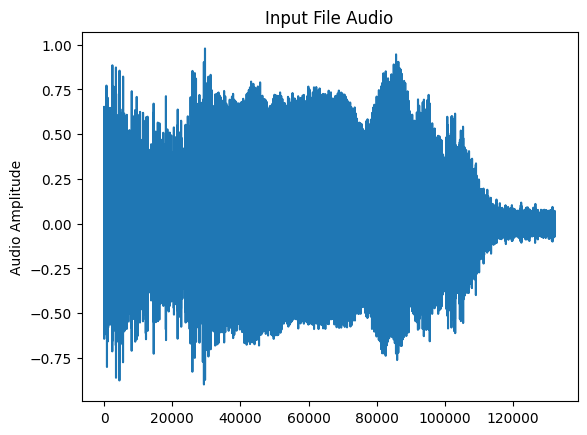

In [12]:
plt.plot(wav)
plt.title("Input File Audio")
plt.ylabel("Audio Amplitude")
plt.show()